In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
%cd /content/drive/MyDrive/detascience/space taitanic/

/content/drive/MyDrive/detascience/space taitanic


In [ ]:
!pip install optuna
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import optuna

In [4]:
dir_path = '/content/drive/MyDrive/detascience/space taitanic/'

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
train = pd.read_csv(dir_path + 'train.csv')
test = pd.read_csv(dir_path + 'test.csv')

In [7]:
train['WhatIsData'] = 'train'
test['WhatIsData'] = 'test'

In [8]:
p = test['PassengerId']

In [9]:
df = pd.concat([train,test],axis=0)

In [10]:
df = df.reset_index(drop=True)

In [ ]:
df.tail()

In [ ]:
df.isnull().sum()

In [ ]:
sns.countplot(df['HomePlanet'],data=df)

In [ ]:
df['HomePlanet'] = df['HomePlanet'].fillna('Earth')

In [ ]:
df.isnull().sum()

In [ ]:
sns.countplot(df['CryoSleep'],data=df)

In [16]:
df['CryoSleep'] = df['CryoSleep'].fillna('False')

In [17]:
df['CryoSleep'] = df['CryoSleep'].astype(bool)

In [ ]:
df.isnull().sum()

In [19]:
df['Cabin1'] = df['Cabin'].str.split('/',expand=True)[0]
df['Cabin2'] = df['Cabin'].str.split('/',expand=True)[1]
df['Cabin3'] = df['Cabin'].str.split('/',expand=True)[2]

In [ ]:
sns.countplot(df['Cabin1'],data=df)

In [21]:
df['Cabin1'] = df['Cabin1'].fillna('F')

In [ ]:
df['Cabin2'].value_counts()

In [23]:
df['Cabin2'] = df['Cabin2'].fillna(2000)

In [24]:
df['Cabin2'] = df['Cabin2'].astype(int)

In [ ]:
plt.figure(figsize=(16,9))
plt.hist(df['Cabin2'],bins=350,color='blue')

In [26]:
df.loc[(0<=df['Cabin2'])&(df['Cabin2']<350),'Cabin2'] = 1
df.loc[(350<=df['Cabin2'])&(df['Cabin2']<600),'Cabin2'] = 2
df.loc[(600<=df['Cabin2'])&(df['Cabin2']<1500),'Cabin2'] = 3
df.loc[(1500<=df['Cabin2'])&(df['Cabin2']<2000),'Cabin2'] = 4

In [27]:
df['Cabin2'].value_counts()

1       5776
3       4352
2       1729
4        814
2000     299
Name: Cabin2, dtype: int64

In [28]:
df.loc[df['Cabin2']==2000,'Cabin2']=1

In [ ]:
plt.figure(figsize=(16,9))
sns.countplot(df['Cabin2'],hue=df['Transported'])

In [ ]:
plt.figure(figsize=(16,9))
sns.countplot(df['Cabin3'])

In [31]:
df['Cabin3'].value_counts()

S    6381
P    6290
Name: Cabin3, dtype: int64

In [ ]:
df.head()

In [33]:
df['Cabin3'] = df['Cabin3'].fillna('S')

In [34]:
df.isnull().sum()

PassengerId        0
HomePlanet       288
CryoSleep          0
Cabin            299
Destination      274
Age              270
VIP              296
RoomService      263
FoodCourt        289
ShoppingMall     306
Spa              284
VRDeck           268
Name             294
Transported     4277
WhatIsData         0
Cabin1             0
Cabin2             0
Cabin3             0
dtype: int64

In [ ]:
plt.figure(figsize=(16,9))
sns.countplot(df['Destination'])

In [ ]:
df['Destination'] = df['Destination'].fillna('TRAPPIST-1e')

(array([ 847.,  956., 3207., 2933., 2000., 1346.,  773.,  439.,  153.,
          46.]),
 array([ 0. ,  7.9, 15.8, 23.7, 31.6, 39.5, 47.4, 55.3, 63.2, 71.1, 79. ]),
 <BarContainer object of 10 artists>)

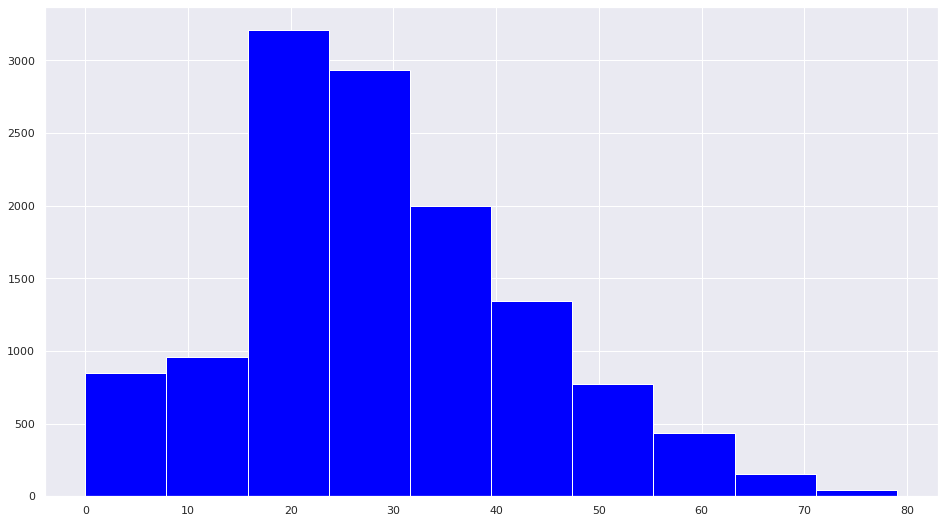

In [36]:
plt.figure(figsize=(16,9))
plt.hist(df['Age'],bins=10,color='blue')

In [37]:
df['Age'] = df['Age'].fillna(100)

In [38]:
df['Age'] = df['Age'].astype(int)

In [39]:
df.loc[(0<=df['Age'])&(df['Age']<10),'Age'] = 1
df.loc[(10<=df['Age'])&(df['Age']<20),'Age'] = 2
df.loc[(20<=df['Age'])&(df['Age']<30),'Age'] = 3
df.loc[(30<=df['Age'])&(df['Age']<40),'Age'] = 4
df.loc[(40<=df['Age'])&(df['Age']<50),'Age'] = 5
df.loc[(50<=df['Age'])&(df['Age']<60),'Age'] = 6
df.loc[(60<=df['Age'])&(df['Age']<70),'Age'] = 7
df.loc[(70<=df['Age'])&(df['Age']<80),'Age'] = 8
df.loc[(80<=df['Age'])&(df['Age']<101),'Age'] = 9

In [ ]:
plt.figure(figsize=(16,9))
sns.countplot(df['Age'],hue=df['Transported'])

In [ ]:
df.loc[df['Age']==9,'Age'] = 3

In [ ]:
df.isnull().sum()

In [ ]:
plt.figure(figsize=(16,9))
sns.countplot(df['VIP'],hue=df['Transported'])

In [42]:
df['VIP'] = df['VIP'].fillna('False')

In [43]:
df['VIP'] = df['VIP'].astype(bool)

In [44]:
df.isnull().sum()

PassengerId        0
HomePlanet       288
CryoSleep          0
Cabin            299
Destination      274
Age                0
VIP                0
RoomService      263
FoodCourt        289
ShoppingMall     306
Spa              284
VRDeck           268
Name             294
Transported     4277
WhatIsData         0
Cabin1             0
Cabin2             0
Cabin3             0
dtype: int64

In [45]:
df['RoomService'] = df['RoomService'].fillna(df['RoomService'].median())
df['FoodCourt'] = df['FoodCourt'].fillna(df['FoodCourt'].median())
df['ShoppingMall'] = df['ShoppingMall'].fillna(df['ShoppingMall'].median())
df['Spa'] = df['Spa'].fillna(df['Spa'].median())
df['VRDeck'] = df['VRDeck'].fillna(df['VRDeck'].median())

In [46]:
df['RoomService'] = df['RoomService'].astype(int)
df['FoodCourt'] = df['FoodCourt'].astype(int)
df['ShoppingMall'] = df['ShoppingMall'].astype(int)
df['Spa'] = df['Spa'].astype(int)
df['VRDeck'] = df['VRDeck'].astype(int)

In [47]:
df['Pay'] = df['RoomService'] + df['FoodCourt'] + df['ShoppingMall'] + df['Spa'] + df['VRDeck']

In [48]:
df.tail()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,WhatIsData,Cabin1,Cabin2,Cabin3,Pay
12965,9266_02,Earth,True,G/1496/S,TRAPPIST-1e,4,False,0,0,0,0,0,Jeron Peter,NaN,test,G,3,S,0
12966,9269_01,Earth,False,NaN,TRAPPIST-1e,5,False,0,847,17,10,144,Matty Scheron,NaN,test,F,1,S,1018
12967,9271_01,Mars,True,D/296/P,55 Cancri e,9,False,0,0,0,0,0,Jayrin Pore,NaN,test,D,1,P,0
12968,9273_01,Europa,False,D/297/P,NaN,9,False,0,2680,0,0,523,Kitakan Conale,NaN,test,D,1,P,3203
12969,9277_01,Earth,True,G/1498/S,PSO J318.5-22,5,False,0,0,0,0,0,Lilace Leonzaley,NaN,test,G,3,S,0


In [ ]:
from sklearn.preprocessing import LabelEncoder
lbl = LabelEncoder()

In [ ]:
df['HomePlanet'] = lbl.fit_transform(df['HomePlanet'])
df['Destination'] = lbl.fit_transform(df['Destination'])
df['Cabin1'] = lbl.fit_transform(df['Cabin1'])
df['Cabin3'] = lbl.fit_transform(df['Cabin3'])
df['Transported'] = lbl.fit_transform(df['Transported'])

In [ ]:
df.reset_index()

,index,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,WhatIsData,Cabin1,Cabin2,Cabin3,Pay
0,0,1,False,2,4,False,0,0,0,0,0,0,train,1,1,0,0
1,1,0,False,2,3,False,109,9,25,549,44,1,train,5,1,1,736
2,2,1,False,2,6,True,43,3576,0,6715,49,0,train,0,1,1,10383
3,3,1,False,2,4,False,0,1283,371,3329,193,0,train,0,1,1,5176
4,4,0,False,2,2,False,303,70,151,565,2,1,train,5,1,1,1091
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12965,12965,0,True,2,4,False,0,0,0,0,0,2,test,6,3,1,0
12966,12966,0,False,2,5,False,0,847,17,10,144,2,test,5,1,1,1018
12967,12967,2,True,0,3,False,0,0,0,0,0,2,test,3,1,0,0
12968,12968,1,False,2,3,False,0,2680,0,0,523,2,test,3,1,0,3203


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8693 entries, 0 to 8692
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    8693 non-null   int64  
 1   CryoSleep     8693 non-null   bool   
 2   Destination   8693 non-null   int64  
 3   Age           8693 non-null   int64  
 4   VIP           8693 non-null   bool   
 5   RoomService   8693 non-null   float64
 6   FoodCourt     8693 non-null   float64
 7   ShoppingMall  8693 non-null   float64
 8   Spa           8693 non-null   float64
 9   VRDeck        8693 non-null   float64
 10  Transported   8693 non-null   int64  
 11  WhatIsData    8693 non-null   object 
 12  Cabin1        8693 non-null   int64  
 13  Cabin2        8693 non-null   int64  
 14  Cabin3        8693 non-null   int64  
 15  Pay           8693 non-null   float64
dtypes: bool(2), float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [ ]:
train = df.loc[(df['WhatIsData']=='train')]
test = df.loc[(df['WhatIsData']=='test')]

In [ ]:
x = train.drop(['WhatIsData'],axis=1)
t = train.iloc[:,10:11]

In [ ]:
x.head()

In [ ]:
x = x.drop(['Transported'],axis=1)

In [ ]:
x_test = test.drop(['WhatIsData','Transported'],axis=1)

In [ ]:
x.tail()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Cabin1,Cabin2,Cabin3,Pay
8688,1,False,0,5,True,0,6819,0,1643,74,0,1,0,8536
8689,0,True,1,2,False,0,0,0,0,0,6,3,1,0
8690,0,False,2,3,False,0,0,1872,1,0,6,4,1,1873
8691,1,False,0,4,False,0,1049,0,353,3235,4,3,1,4637
8692,1,False,2,5,False,126,4688,0,0,12,4,3,1,4826


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
import lightgbm as lgb
from sklearn.model_selection import StratifiedKFold

In [ ]:
kf=StratifiedKFold(n_splits=10, shuffle=True, random_state=0)

In [ ]:
def objective(trial):
      params={"metric":"auc",
              "objective":"binary", 
              "max_depth":trial.suggest_int("max_depth",5,1000),
              "num_leaves":trial.suggest_int("num_leaves",10,3000),
              "min_child_samples":trial.suggest_int("min_child_samples",50,500),
              "learning_rate":trial.suggest_uniform("learning_rate",0.01,1.5),
              "feature_fraction":trial.suggest_uniform("feature_fraction",0,1),
              "bagging_fraction":trial.suggest_uniform("bagging_fraction",0,1)}
      
      val_scores=[]

      for i, (train__, val__) in enumerate(kf.split(x,t)):
          x_train, x_val=x.iloc[train__], x.iloc[val__]
          t_train, t_val=t.iloc[train__], t.iloc[val__]
          lgb_train=lgb.Dataset(x_train, t_train)
          lgb_eval=lgb.Dataset(x_val, t_val)

          lgbm=lgb.train(params,
                         lgb_train,
                         valid_sets=lgb_eval,
                         num_boost_round=1000,
                         early_stopping_rounds=50,
                         verbose_eval=False)
          
          t_train_pred=np.round(lgbm.predict(x_train))
          t_val_pred=np.round(lgbm.predict(x_val))
          scoretrain=metrics.accuracy_score(t_train["Transported"],t_train_pred)
          scoreval=metrics.accuracy_score(t_val["Transported"],t_val_pred)
          val_scores.append(scoreval)

      cv_score=np.mean(val_scores)

      return cv_score

In [ ]:
study=optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=50)

In [ ]:
x_train,x_val,t_train,t_val=train_test_split(x,t,test_size=0.25,stratify=t)
lgb_train=lgb.Dataset(x_train, t_train)
lgb_eval=lgb.Dataset(x_val, t_val)

In [ ]:
bestparams={"metric":"auc",
            "objective":"binary", 
            "max_depth":study.best_params["max_depth"],
            "num_leaves":study.best_params["num_leaves"],
            "min_child_samples":study.best_params["min_child_samples"],
            "learning_rate":study.best_params["learning_rate"],
            "feature_fraction":study.best_params["feature_fraction"],
            "bagging_fraction":study.best_params["bagging_fraction"]}


best_lgbm=lgb.train(bestparams,
                    lgb_train,
                    valid_sets=lgb_eval,
                    num_boost_round=1000,
                    early_stopping_rounds=50,
                    verbose_eval=50)

Training until validation scores don't improve for 50 rounds.
[50]	valid_0's auc: 0.893481
Early stopping, best iteration is:
[26]	valid_0's auc: 0.896223


In [ ]:
pred=np.round(best_lgbm.predict(x_test))

In [ ]:
study.best_params

{'max_depth': 807,
 'num_leaves': 478,
 'min_child_samples': 79,
 'learning_rate': 0.19814705704116223,
 'feature_fraction': 0.9531375889998339,
 'bagging_fraction': 0.24741004595917504}

In [ ]:
print(metrics.accuracy_score(t_train["Transported"],np.round(best_lgbm.predict(x_train))))
print(metrics.accuracy_score(t_val["Transported"],np.round(best_lgbm.predict(x_val))))

0.8435342843994478
0.8141674333026679


In [ ]:
df_predict=pd.DataFrame(pred.astype(int),columns=["Transported"])
df_predict["Transported"]=df_predict["Transported"].astype(bool)

In [ ]:
df_predict['PassengerId'] = p

In [ ]:
df_predict.head()

In [ ]:
df_predict = df_predict.reindex(columns=['PassengerId','Transported'])

In [ ]:
x_test = x_test.reindex(columns=['PassengerId','Transported'])

In [ ]:
x_test['Transported'] = x_test['Transported'].astype(int)

In [ ]:
for i in x_test['Transported']:
    if i == 0:
        x_test['Transported'].replace(0,False)
    elif i == 1:
        x_test['Transported'].replace(1,True)
    
    x_test['Transported'] = x_test['Transported'].astype(bool)

In [ ]:
x_test.head()

In [ ]:
x_test.to_csv('submission.csv')